# Text Mining assignment- Part 1 

    1) Extract reviews of any movie from rottentomatoes website
    2) Perform emotion mining

### Web scrapping

In [8]:
# We shall scrap some reviews of movie Soul from rottentomatoes website
import requests
from bs4 import BeautifulSoup as bs

# install selenium library
# install chromedriver (use google chrome browser)
#! pip install selenium

from selenium import webdriver
PATH = 'C:\Program Files (x86)\chromedriver.exe' #(specify chromedriver path)
driver = webdriver.Chrome(PATH) # create an object of selenium webdriver which will help you connect with website using chrome browser

print(driver.title)

url = "https://www.rottentomatoes.com/m/soul_2020/reviews?type=user" 
html = requests.get(url).content
soup = bs(html,'html.parser')

paras = soup.find_all('p',{'class':"audience-reviews__review--mobile js-review-text clamp clamp-4 js-clamp" })
reviews = [p.string for p in paras]
reviews

# Reviews are paginated. Above code extracts 10 reviews available on page 1. Also the pagination is on same url, next set of 
# 10 reviews can be accessed by clicking on next button. 
# For such automated interaction we use another python for web scraping library selenium

driver.get(url)
for i in range(0,9):
    # We will find 'next' button on webpage, click on it and wait for 10 secs for next page of reviews to load. 
    element=driver.find_element_by_xpath("//button[@class='js-prev-next-paging-next btn prev-next-paging__button prev-next-paging__button-right']")
    element.click() 
    driver.implicitly_wait(10) # wait for 10 seconds for next page to load
    
    # We next scrape 10 review texts on new page and add it to reviews list
    try:
        paras = driver.find_elements_by_xpath("//p[contains(@class,'audience-reviews__review ')]")
        paras = [p.text for p in paras]
    except:
        paras = driver.find_elements_by_xpath("//p[contains(@class,'audience-reviews__review ')]")
        paras = [p.text for p in paras]
    reviews.extend(paras)
driver.close()

len(reviews) 

100

In [33]:
reviews[5]

'Simply fantastic, Soul has a great script telling an inspiring story thru a fresh premise. \nIt\'s nice to see the Pixar that made "UP" and "Wall-E" has still got it! 👌 \nAlso it\'s free on Disney+, unlike that Mulan nonsense.'

In [ ]:
import sys
sys.setrecursionlimit(10**6)
import pickle

with open('reviews.txt','wb') as f:
    pickle.dump(reviews,f)

In [34]:
with open('reviews.txt','rb') as f:
    text = pickle.load(f)
text[5] 

'Simply fantastic, Soul has a great script telling an inspiring story thru a fresh premise. \nIt\'s nice to see the Pixar that made "UP" and "Wall-E" has still got it! 👌 \nAlso it\'s free on Disney+, unlike that Mulan nonsense.'

### Named Entity Relationship

In [41]:
import spacy
nlp = spacy.load('en_core_web_sm')

doc = nlp(str(text[5]))

for token in doc:
    print(f'{token.text:<{10}} {token.pos_:<{10}} {spacy.explain(token.pos_)}')

Simply     ADV        adverb
fantastic  ADJ        adjective
,          PUNCT      punctuation
Soul       PROPN      proper noun
has        AUX        auxiliary
a          DET        determiner
great      ADJ        adjective
script     NOUN       noun
telling    VERB       verb
an         DET        determiner
inspiring  VERB       verb
story      NOUN       noun
thru       ADP        adposition
a          DET        determiner
fresh      ADJ        adjective
premise    NOUN       noun
.          PUNCT      punctuation

          SPACE      space
It         PRON       pronoun
's         AUX        auxiliary
nice       ADJ        adjective
to         PART       particle
see        VERB       verb
the        DET        determiner
Pixar      PROPN      proper noun
that       DET        determiner
made       VERB       verb
"          PUNCT      punctuation
UP         NOUN       noun
"          PUNCT      punctuation
and        CCONJ      coordinating conjunction
"          PUNCT      pun

In [42]:
POS_counts = doc.count_by(spacy.attrs.POS)
POS_counts

{86: 3,
 84: 5,
 97: 10,
 96: 6,
 87: 4,
 90: 6,
 92: 5,
 100: 5,
 85: 3,
 103: 2,
 95: 3,
 94: 1,
 89: 1,
 91: 1}

In [52]:
for key,value in POS_counts.items():
    print(f'{spacy.explain(doc.vocab[key].text):<{25}} {value}')

adverb                    3
adjective                 5
punctuation               10
proper noun               6
auxiliary                 4
determiner                6
noun                      5
verb                      5
adposition                3
space                     2
pronoun                   3
particle                  1
coordinating conjunction  1
interjection              1


In [54]:
from spacy import displacy
displacy.render(doc,jupyter=True,style='ent');

In [55]:
for ent in doc.ents:
    print(f'{ent.text:<{10}} {ent.label_:<{10}} {spacy.explain(ent.label_)}')

Soul       PRODUCT    Objects, vehicles, foods, etc. (not services)
Pixar      NORP       Nationalities or religious or political groups
Mulan      ORG        Companies, agencies, institutions, etc.


### Sentiment Analysis
Using VADER Valence Aware Dictionary for sEntiment Reasoning model available in NLTK package 
It is used for text sentiment analysis which is sensitive to both polarity (positive/negative) and intensity (strength of emotion)

In [88]:
import nltk
#nltk.download('vader_lexicon') 

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [106]:
for i,t in enumerate(text):
    text[i] = text[i].replace("\n",'')
    text[i] = text[i].replace("\'",'')
text[0:3]

['This film will impact you until you feel it in your soul and heart, with a perfect combination between a great message about the use of your life and how you want to take advantage of it, thanks to a good development of story, characters, animation, and other things. that being together, they manage to make a festival for the whole family.',
 'A great film, worthy of Pixars genius. In terms of animation, its one of the most beautiful Ive seen. Whether its with realistic characters or for the characters a little more cartoon, their expressions are very communicative which makes the characters and their writing even more endearing. The scenario or the dialogues are a pleasure the characters are endearing from their first meeting. The music is very striking and beautiful. And finally Pixar gives us one of the most beautiful lessons that every person on earth has to learn: "Enjoy every moment of your life". A film to see and watch again',
 'Must watch!    "Enjoy every moment of life beca

In [107]:
import pandas as pd
df = pd.DataFrame(text,columns=['reviews'])
df.head()

,reviews
0,This film will impact you until you feel it in...
1,"A great film, worthy of Pixars genius. In term..."
2,"Must watch! ""Enjoy every moment of life bec..."
3,One of the more visually impressive and concep...
4,This was a charming and wholesome movie that I...


In [108]:
len(df)

100

In [110]:
# checking the polarity score of review indexed 0
sid.polarity_scores(df.iloc[0]['reviews'])

# Review indexed 0 is positive review evident from positive compound score

{'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.959}

In [111]:
# Creating a new column for polarity scores
df['scores'] = df['reviews'].apply(lambda x: sid.polarity_scores(x))
df.head()

,reviews,scores
0,This film will impact you until you feel it in...,"{'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'comp..."
1,"A great film, worthy of Pixars genius. In term...","{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp..."
2,"Must watch! ""Enjoy every moment of life bec...","{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound..."
3,One of the more visually impressive and concep...,"{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'comp..."
4,This was a charming and wholesome movie that I...,"{'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'comp..."


In [112]:
df['compound'] = df['scores'].apply(lambda x:x['compound'])

In [113]:
df['sentiment'] = df['compound'].apply(lambda x: 'pos' if x>=0 else 'neg')
df.head()

,reviews,scores,compound,sentiment
0,This film will impact you until you feel it in...,"{'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'comp...",0.9590,pos
1,"A great film, worthy of Pixars genius. In term...","{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.9808,pos
2,"Must watch! ""Enjoy every moment of life bec...","{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",0.5411,pos
3,One of the more visually impressive and concep...,"{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'comp...",0.7564,pos
4,This was a charming and wholesome movie that I...,"{'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'comp...",0.9660,pos


In [114]:
df['sentiment'].value_counts()

pos    77
neg    23
Name: sentiment, dtype: int64

### Visualizations

In [119]:
def display_wordcloud(text):
    # Generate wordcloud
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud,STOPWORDS

    #for word in []:
    #    STOPWORDS.add(word)
    plt.figure(figsize=(40, 30))
    wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=STOPWORDS).generate(text)
    plt.imshow(wordcloud) # display image
    plt.axis("off"); #No axis details

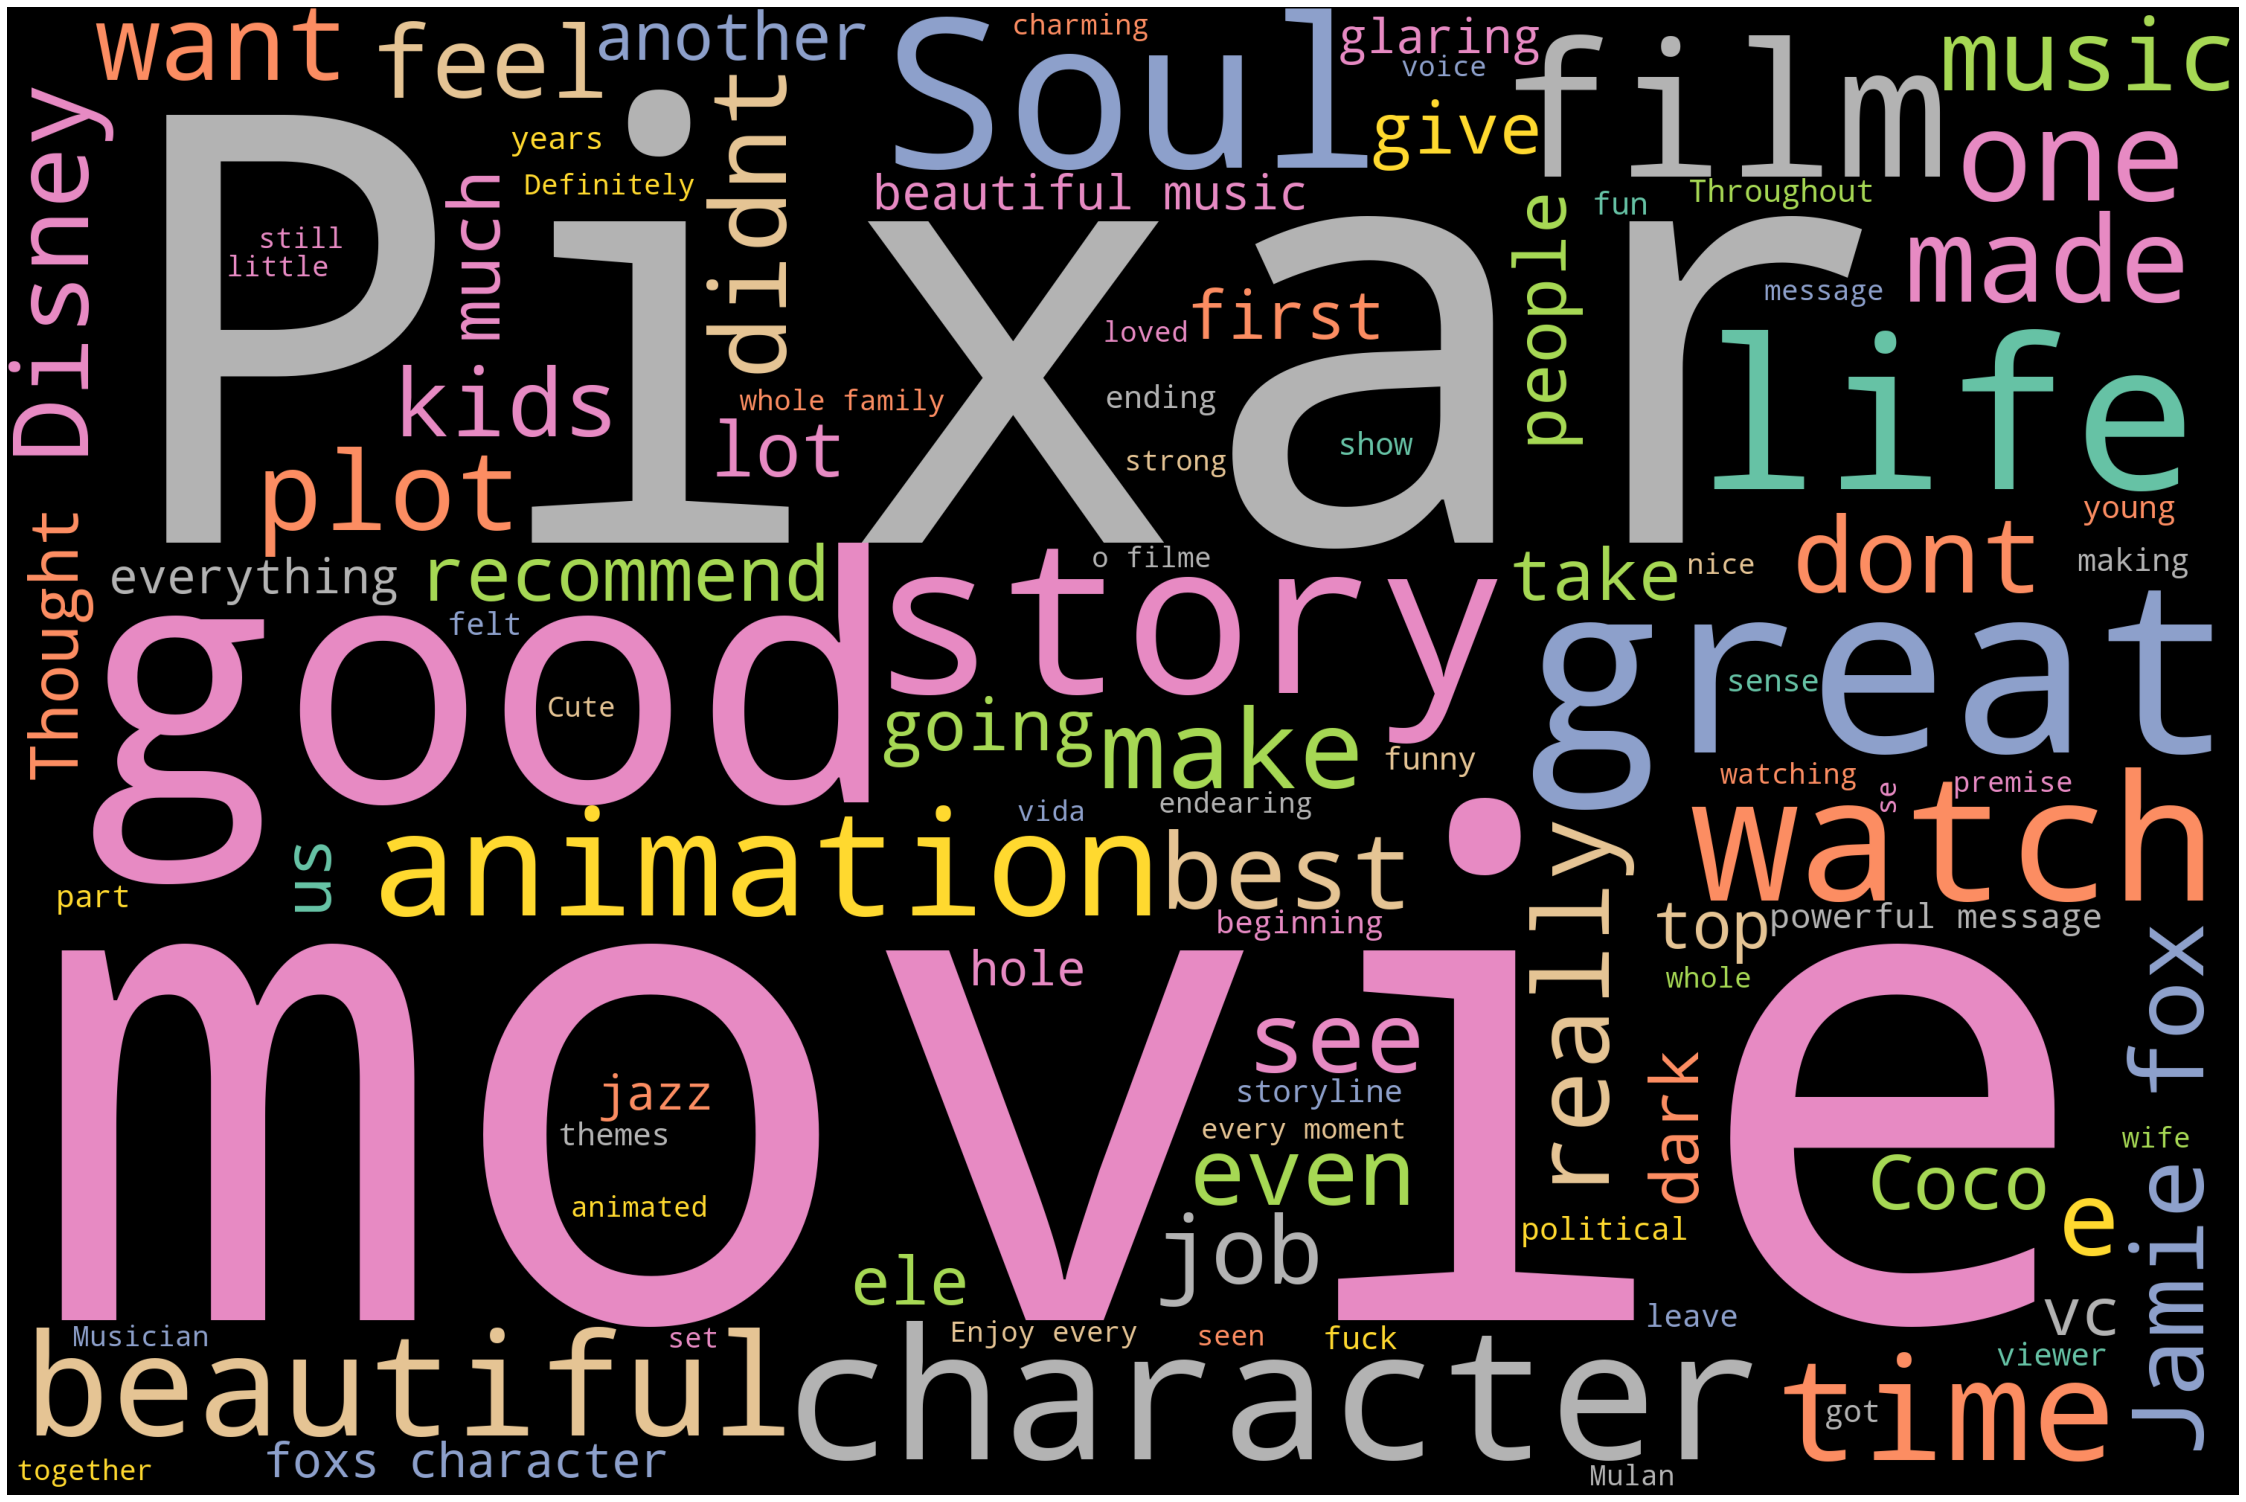

In [120]:
# Wordcloud for text
review = ''.join(text)
display_wordcloud(review)

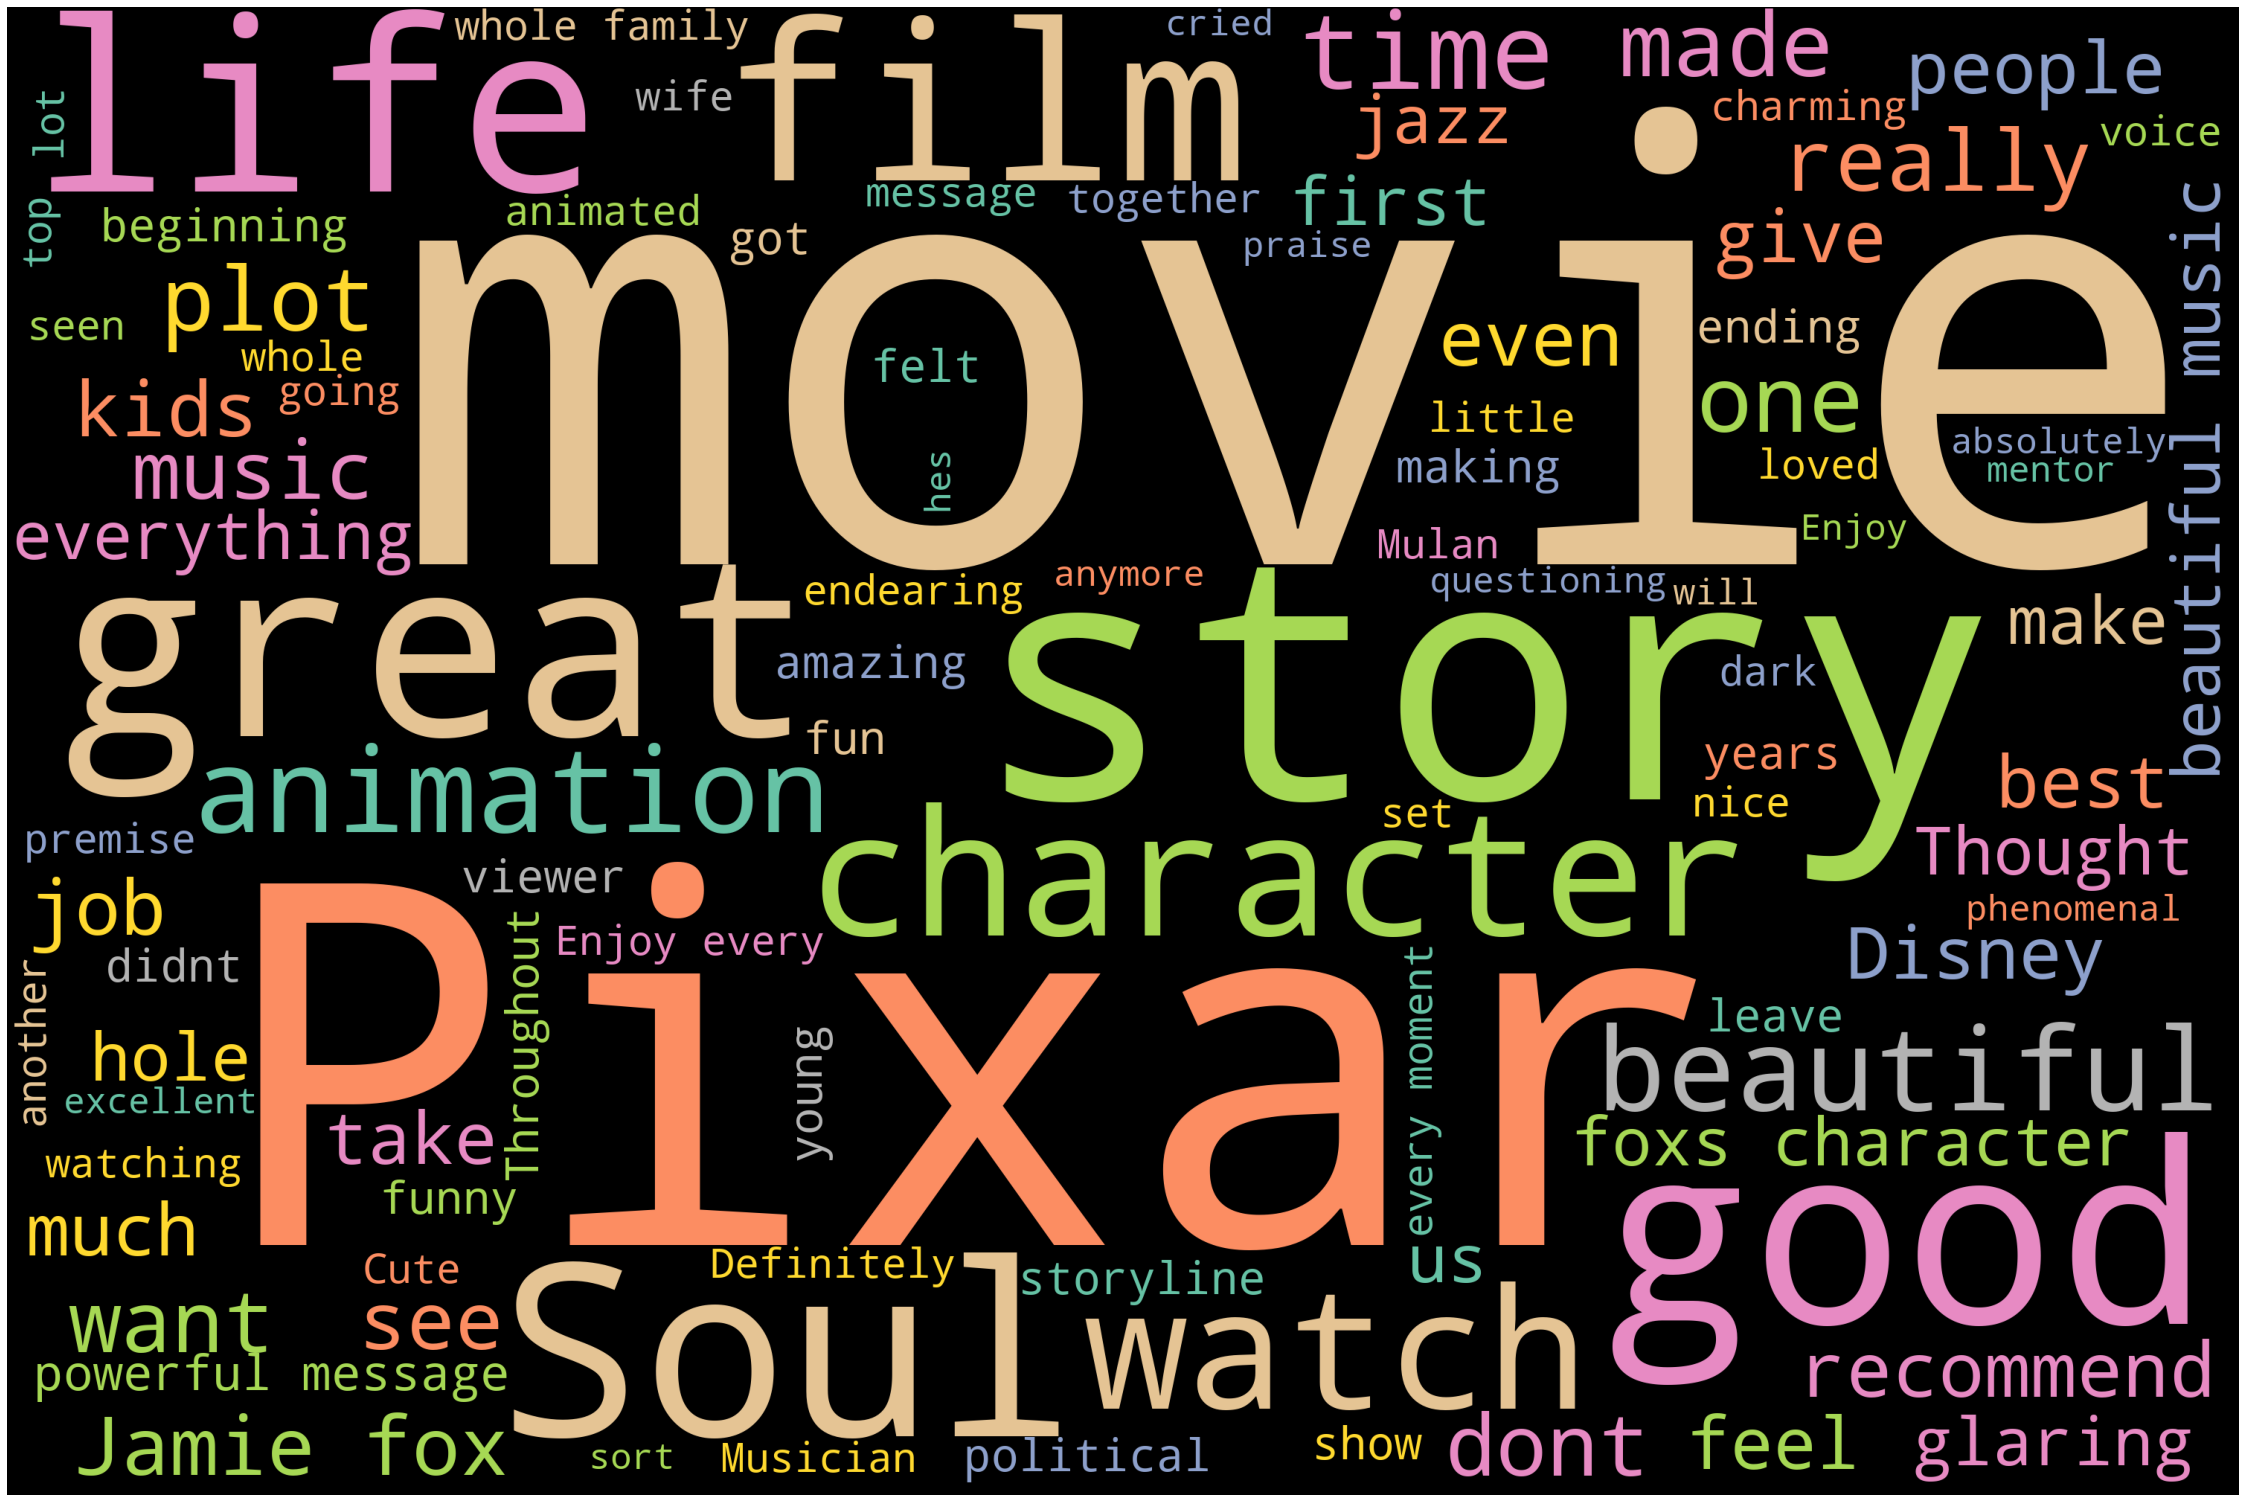

In [121]:
pos_reviews = df[df['sentiment']=='pos']['reviews'].str.cat(sep=', ')
pos_reviews = ''.join(pos_reviews)
display_wordcloud(pos_reviews)

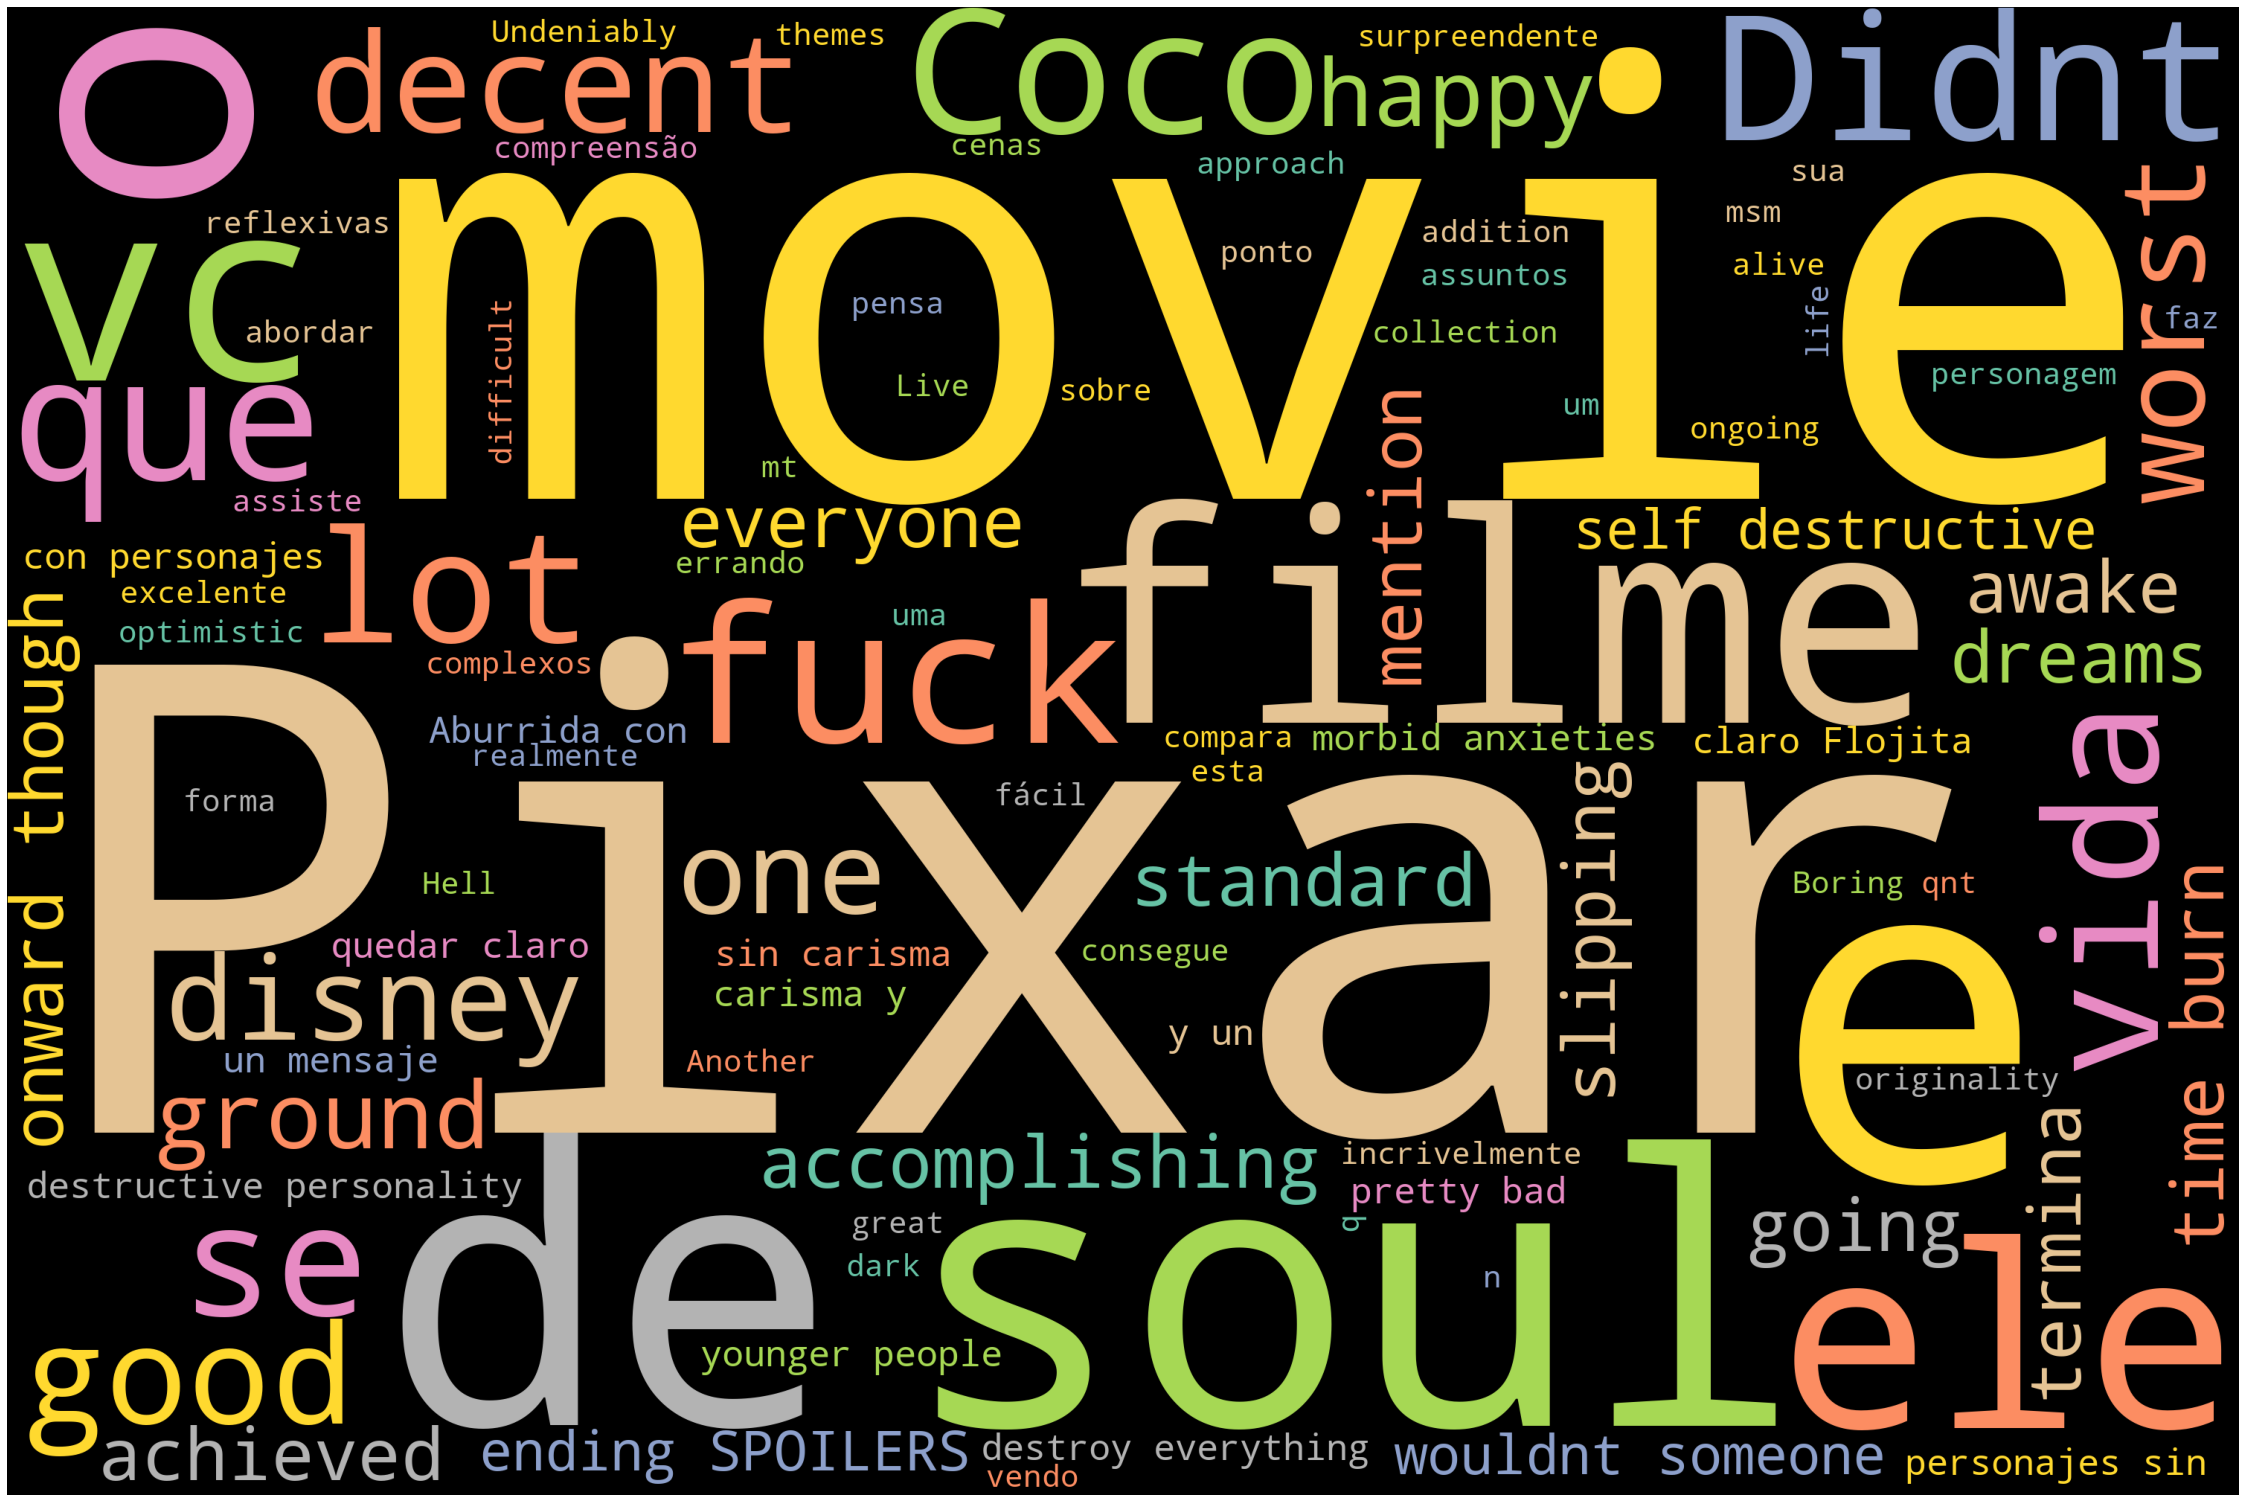

In [122]:
neg_reviews = df[df['sentiment']=='neg']['reviews'].str.cat(sep=', ')
neg_reviews = ''.join(neg_reviews)
display_wordcloud(neg_reviews)

In [ ]:
# A funny common word here is desoul for soul movie :P which is displayed as negative word indeed

# We see some positive words in negative reviews. In all possibility VADER have incorrectly classified some positive reviews
# as negative. We need to manually revisit negative reviews and rectify the labels. 

# For now let's ignore these misclassifications and consider it as true labels.
# We shall now perform text classification

### Text classification

In [125]:
X = df['reviews']
y = df['sentiment']

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [128]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
# fit (build vocab using the data, count the number of words..) Transform (create a numerical vector)
X_train_count = count_vect.fit_transform(X_train)
X_train_count # compressed due to sparse vector

<70x645 sparse matrix of type '<class 'numpy.int64'>'
	with 2206 stored elements in Compressed Sparse Row format>

In [129]:
X_train.shape # 645 unique words (vocab counts) in 65 reviews of X_train

(70,)

In [131]:
# transform count to frequencies using tfidf
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_count)

In [132]:
X_train_tfidf.shape

(70, 645)

In [133]:
# Using vectorizer to transform our data directly to tfidf instead of using count vectoriser as intermediate step
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [134]:
from sklearn.svm import LinearSVC
model = LinearSVC()

In [135]:
model.fit(X_train_tfidf,y_train)

LinearSVC()

In [137]:
# Let's create a pipeline
from sklearn.pipeline import Pipeline
model_pipe = Pipeline([('tfidf',TfidfVectorizer()),('model',LinearSVC())])

In [138]:
model_pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', LinearSVC())])

In [140]:
predictions = model_pipe.predict(X_test)

In [142]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       1.00      0.67      0.80         9
         pos       0.88      1.00      0.93        21

    accuracy                           0.90        30
   macro avg       0.94      0.83      0.87        30
weighted avg       0.91      0.90      0.89        30



In [143]:
confusion_matrix(y_test,predictions)

array([[ 6,  3],
       [ 0, 21]], dtype=int64)

In [145]:
model_pipe.predict(['It is good'])

array(['pos'], dtype=object)

# Thank you!